In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_2016 = pd.read_csv("train_2016_v2.csv")
properties_2016 = pd.read_csv("properties_2016.csv")

train_2017 = pd.read_csv("train_2017.csv")
properties_2017 = pd.read_csv("properties_2017.csv")

In [3]:
train_2017.shape, properties_2017.shape

((77613, 3), (2985217, 58))

In [4]:
train_2017.head()

,parcelid,logerror,transactiondate
0,14297519,0.025595,2017-01-01
1,17052889,0.055619,2017-01-01
2,14186244,0.005383,2017-01-01
3,12177905,-0.103410,2017-01-01
4,10887214,0.006940,2017-01-01


In [5]:
properties_2017.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


In [6]:
data_2017 = pd.merge(train_2017, properties_2017, on='parcelid', how='left')
data_2017.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,14297519,0.025595,2017-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13
1,17052889,0.055619,2017-01-01,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13
2,14186244,0.005383,2017-01-01,NaN,NaN,NaN,2.0,3.0,NaN,NaN,...,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13
3,12177905,-0.103410,2017-01-01,NaN,NaN,NaN,3.0,4.0,NaN,8.0,...,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13
4,10887214,0.006940,2017-01-01,1.0,NaN,NaN,3.0,3.0,NaN,8.0,...,NaN,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,NaN,NaN,6.037124e+13


In [7]:
null_ratio = data_2017.isnull().sum().sort_values(ascending=False) / (len(data_2017.index) + 1) * 100
null_ratio

buildingclasstypeid             99.979385
finishedsquarefeet13            99.944598
basementsqft                    99.934290
storytypeid                     99.934290
yardbuildingsqft26              99.908522
fireplaceflag                   99.777102
architecturalstyletypeid        99.732007
typeconstructiontypeid          99.711392
finishedsquarefeet6             99.501379
pooltypeid10                    99.399593
decktypeid                      99.207617
poolsizesum                     98.879068
pooltypeid2                     98.614941
hashottuborspa                  98.015822
yardbuildingsqft17              96.915505
taxdelinquencyyear              96.262272
taxdelinquencyflag              96.262272
finishedsquarefeet15            96.098642
finishedfloor1squarefeet        92.220476
finishedsquarefeet50            92.220476
fireplacecnt                    89.318937
threequarterbathnbr             86.977865
pooltypeid7                     80.570516
poolcnt                         79

In [8]:
data_2017.dtypes

parcelid                          int64
logerror                        float64
transactiondate                  object
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object


In [9]:
drop_data = null_ratio[null_ratio > 90].index.tolist()
data_2017[drop_data].dtypes

buildingclasstypeid         float64
finishedsquarefeet13        float64
basementsqft                float64
storytypeid                 float64
yardbuildingsqft26          float64
fireplaceflag                object
architecturalstyletypeid    float64
typeconstructiontypeid      float64
finishedsquarefeet6         float64
pooltypeid10                float64
decktypeid                  float64
poolsizesum                 float64
pooltypeid2                 float64
hashottuborspa               object
yardbuildingsqft17          float64
taxdelinquencyyear          float64
taxdelinquencyflag           object
finishedsquarefeet15        float64
finishedfloor1squarefeet    float64
finishedsquarefeet50        float64
dtype: object

In [10]:
na_obj = data_2017[drop_data].select_dtypes('object').columns # object variables in to_drop list
na_obj

Index(['fireplaceflag', 'hashottuborspa', 'taxdelinquencyflag'], dtype='object')

In [11]:
data_2017[na_obj] = data_2017[na_obj].fillna('None') # value_counts() method does not count NA, so replace it with 'None'
data_2017[na_obj]

,fireplaceflag,hashottuborspa,taxdelinquencyflag
0,None,None,None
1,None,None,None
2,None,None,None
3,None,None,None
4,None,None,None
...,...,...,...
77608,None,None,None
77609,None,None,None
77610,None,None,None
77611,None,None,None


In [12]:
float_values = data_2017[drop_data].select_dtypes('float').columns #remove float values
data_2017.drop(float_values, axis = 1, inplace = True)

In [13]:
#id_cols = [col for col in data_2017.columns if 'id' in col]
data_2017.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,censustractandblock
0,14297519,0.025595,2017-01-01,NaN,3.5,4.0,NaN,3.5,3100.0,3100.0,...,1998.0,NaN,None,485713.0,1023282.0,2016.0,537569.0,11013.72,None,6.059063e+13
1,17052889,0.055619,2017-01-01,NaN,1.0,2.0,NaN,1.0,1465.0,1465.0,...,1967.0,1.0,None,88000.0,464000.0,2016.0,376000.0,5672.48,None,6.111001e+13
2,14186244,0.005383,2017-01-01,NaN,2.0,3.0,NaN,2.0,1243.0,1243.0,...,1962.0,1.0,None,85289.0,564778.0,2016.0,479489.0,6488.30,None,6.059022e+13
3,12177905,-0.103410,2017-01-01,NaN,3.0,4.0,8.0,3.0,2376.0,2376.0,...,1970.0,NaN,None,108918.0,145143.0,2016.0,36225.0,1777.51,None,6.037300e+13
4,10887214,0.006940,2017-01-01,1.0,3.0,3.0,8.0,3.0,1312.0,1312.0,...,1964.0,NaN,None,73681.0,119407.0,2016.0,45726.0,1533.89,None,6.037124e+13


In [14]:
contains_count = data_2017.columns[data_2017.columns.str.contains('cnt|squarefeet|sqft')]
count_means = data_2017[contains_count].mean()
data_2017_v2 = data_2017.fillna(count_means)
data_2017_v2.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,censustractandblock
0,14297519,0.025595,2017-01-01,NaN,3.5,4.0,NaN,3.5,3100.0,3100.0,...,1998.0,NaN,None,485713.0,1023282.0,2016.0,537569.0,11013.72,None,6.059063e+13
1,17052889,0.055619,2017-01-01,NaN,1.0,2.0,NaN,1.0,1465.0,1465.0,...,1967.0,1.0,None,88000.0,464000.0,2016.0,376000.0,5672.48,None,6.111001e+13
2,14186244,0.005383,2017-01-01,NaN,2.0,3.0,NaN,2.0,1243.0,1243.0,...,1962.0,1.0,None,85289.0,564778.0,2016.0,479489.0,6488.30,None,6.059022e+13
3,12177905,-0.103410,2017-01-01,NaN,3.0,4.0,8.0,3.0,2376.0,2376.0,...,1970.0,NaN,None,108918.0,145143.0,2016.0,36225.0,1777.51,None,6.037300e+13
4,10887214,0.006940,2017-01-01,1.0,3.0,3.0,8.0,3.0,1312.0,1312.0,...,1964.0,NaN,None,73681.0,119407.0,2016.0,45726.0,1533.89,None,6.037124e+13


In [15]:
data_2017
data_2017_v2.isnull().sum()

parcelid                            0
logerror                            0
transactiondate                     0
airconditioningtypeid           52606
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           27804
calculatedbathnbr                 650
calculatedfinishedsquarefeet        0
finishedsquarefeet12                0
fips                               34
fireplacecnt                        0
fullbathcnt                         0
garagecarcnt                        0
garagetotalsqft                     0
hashottuborspa                      0
heatingorsystemtypeid           28042
latitude                           34
longitude                          34
lotsizesquarefeet                   0
poolcnt                             0
pooltypeid7                     62534
propertycountylandusecode          34
propertylandusetypeid              34
propertyzoningdesc              27137
rawcensustractandblock             34
regionidcity

In [ ]:
# corr_df = pd.DataFrame(data_2017_v2.corr()['logerror'].sort_values(ascending = False)).rename(columns = {'logerror':'correlation'})
# # corr_selected = corr_df.ix[(corr_df['corr_values']>0.02) | (corr_df['corr_values'] < -0.01)]
# temp_data = 


In [ ]:
corrmat = data_2017_v2.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

In [16]:
#Check for Unique Values
for col in data_2017_v2:
     if len(data_2017_v2[col].unique()) <= 2:
        print(col, len(data_2017_v2[col].unique()),data_2017_v2[col].unique())
        

hashottuborspa 2 ['None' True]
poolcnt 1 [1.]
pooltypeid7 2 [nan  1.]
fireplaceflag 2 ['None' True]
assessmentyear 2 [2016.   nan]
taxdelinquencyflag 2 ['None' 'Y']


In [17]:
#Remove cols with irrelvant values
#Remove only poolcnt and pool type id (other values are either true false)
removed_cols = ['assessmentyear', 'pooltypeid7', 'poolcnt']
data_2017_v2.drop(removed_cols, axis = 1, inplace = True)

<Figure size 864x864 with 0 Axes>

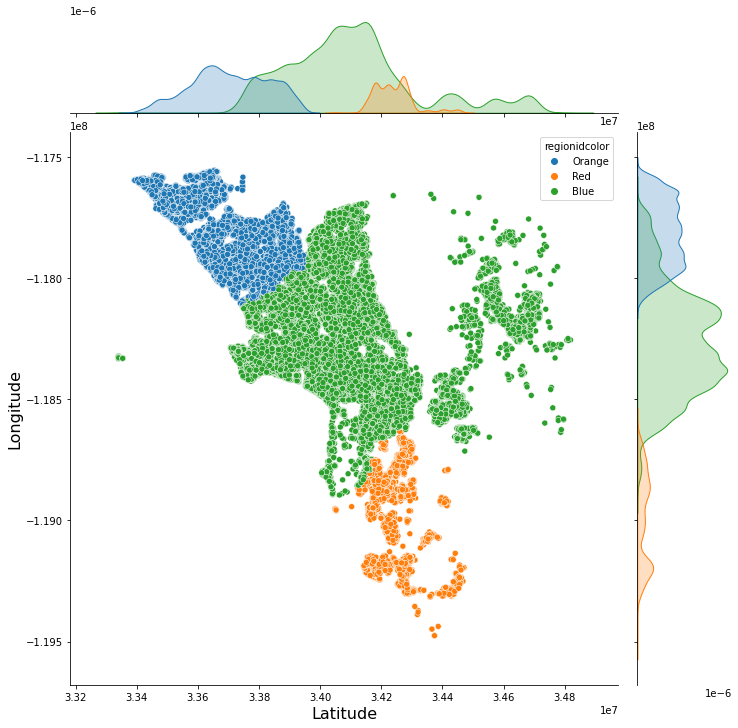

In [39]:
new_cat = []
for value in data_2017_v2['regionidcounty'].values:
    if value == 1286:
        new_cat.append('Orange')
    elif value == 2061:
        new_cat.append('Red') #Ventura
    else:
        new_cat.append('Blue') #LA
        
data_2017_v2['regionidcolor'] = new_cat


plt.figure(figsize=(12,12))
g = sns.jointplot(data=data_2017_v2, x = 'latitude', y = 'longitude', hue = "regionidcolor", size=10)
g.set_axis_labels('Latitude', 'Longitude', fontsize=16)

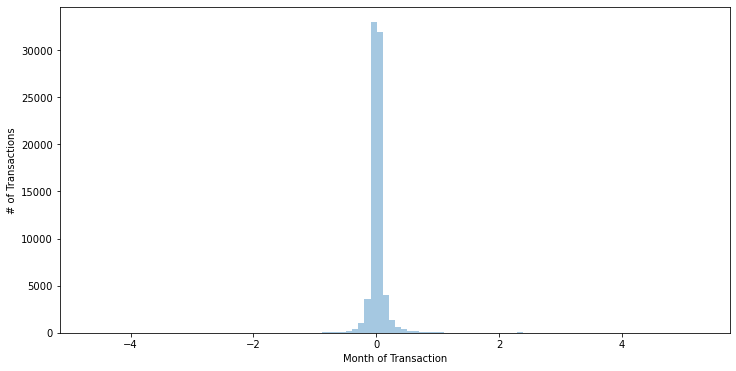

In [101]:
x = data_2017_v2['logerror'].values

plt.figure(figsize = (12,6))
sns.distplot(x, bins = 100, kde = False)
plt.ylabel('Log Error')
plt.xlabel('n');
plt.show()

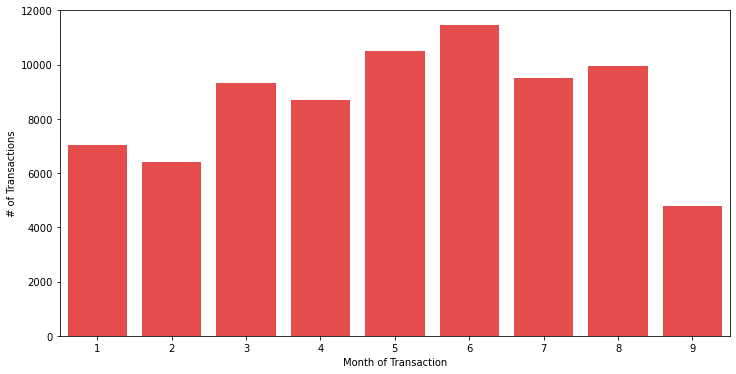

In [91]:
data_2017_v2['transactiondate'] = pd.to_datetime(data_2017_v2['transactiondate'], format = '%Y-%m-%d')

data_2017_v2['year'] = data_2017_v2['transactiondate'].dt.year
data_2017_v2['month'] = data_2017_v2['transactiondate'].dt.month
data_2017_v2['day'] = data_2017_v2['transactiondate'].dt.day
data_2017_v2['weekday'] = data_2017_v2['transactiondate'].dt.weekday

cnt_srs = data_2017_v2['month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color= "red")

plt.ylabel('# of Transactions')
plt.xlabel('Month of Transaction');
plt.show()